<a href="https://colab.research.google.com/github/fnmolina/neural-networks-classification-regression-project/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from keras.datasets import fashion_mnist
(x_data, y_data), (x_test, y_test) = fashion_mnist.load_data()

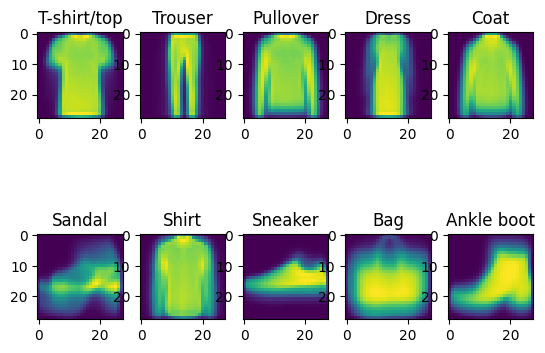

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

figure, axis = plt.subplots(2, 5)
k = 0
for i in range(2):
    for j in range(5):
        axis[i,j].imshow(x_data[np.where(y_data == k)].mean(axis=0))
        axis[i,j].grid(False)
        axis[i,j].set_title(class_names[k])
        k += 1

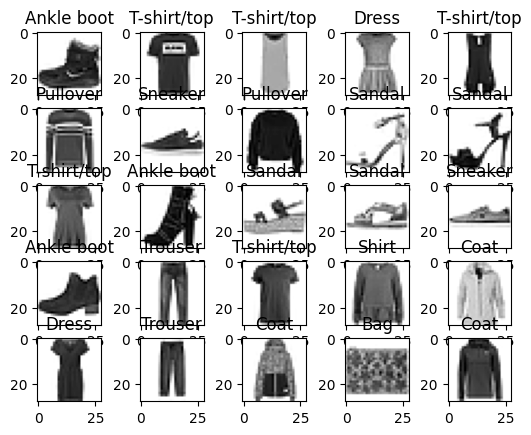

In [19]:
figure, axis = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        axis[i,j].imshow(x_data[k], cmap=plt.cm.binary)
        axis[i,j].grid(False)
        axis[i,j].set_title(class_names[y_data[k]])
        k += 1
plt.show()

Histograma de distribución de clases: las clases son equiprobables.

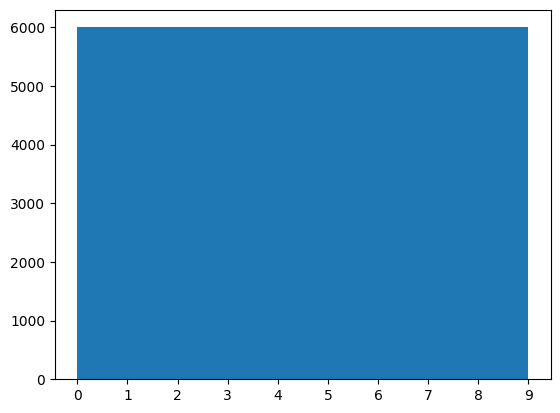

In [17]:
plt.hist(y_data) 
plt.xticks(range(len(set(y_data))))
plt.show()

Data splitting: train/validation datasets:

*   Training data — used for training the model
*   Validation data — used for tuning the hyperparameters and evaluate the models




In [13]:
# 20% del dataset para validación
validation = 0.20
N_validation_split = int(x_data.shape[0]*(1-validation))
# Training Set
x_train = x_data[:N_validation_split]
y_train = y_data[:N_validation_split]

# Cross Validation Set
x_val = x_data[N_validation_split:]
y_val = y_data[N_validation_split:]
print('Training set data:', x_train.shape)
print('Training labels:', y_train.shape)
print()
print('CV set data:', x_val.shape)
print('CV labels:', y_val.shape)

Training set data: (48000, 28, 28)
Training labels: (48000,)

CV set data: (12000, 28, 28)
CV labels: (12000,)


### Data normalization

In [14]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255